In [2]:
import sympy as sp
import scipy as scp
m, g, R, M, I, k, t, VV, E0, r = sp.symbols('m, g, R, M, I, gamma t, omega, E0, r ')

y0, u, w = sp.symbols('y0, u, w ') # y0=y center mass0, u-v center wheel0, w-m vel0

E0 = m*g*y0 + M*u**2/2 + I*u**2/(2*R**2) + m*w**2/2

fi0 = sp.symbols('varphi0')
fi = sp.Function(r'\varphi')(t)
ycm = R*(1+k*sp.cos(fi+fi0))
xmdot = (R*(fi+fi0)+r*sp.sin(fi+fi0)).diff(t)
ymdot = (R+r*sp.cos(fi+fi0)).diff(t)

E1= m*g*(R+r*sp.cos(fi+fi0)) #Wpm
E2 = M*(fi.diff()*R)**2/2 #EM cm
E3 = I*fi.diff()**2/2 #EM relat cm
E4= m*(xmdot**2+ymdot**2)/2 # Em
E = E1 +E2 + E3 +E4


y0 - initial y-coordinate of center of mass
u - initial velocity of center of the wheel
w - initial velocity of m point
fi0 - initial angle between direction to m and a vertical line

In [3]:
#substitution
# factors before w: the third hole 0.21333, the second 0.5133
uin = 3
rin = 0.059
Rin = 0.075
p = (Rin - rin)/Rin 
arr = [(M,0.070), (R, Rin), (r, rin), (m, 0.07), (I,2.15*10**-4), (g,9.8), #system patameters
       (y0, Rin-rin), (u,uin), (w,uin*p), (fi0, 3.1415)] #initial parameters


In [4]:
eq = sp.Eq(E,E0)
fidotonfi = list(sp.solveset(eq, fi.diff()))[0]
fidoubledotonfi = fidotonfi.diff(t)
ycm1 = (ycm.diff(t,2).subs(sp.diff(fi,t,2), fidoubledotonfi )).subs(sp.diff(fi,t), fidotonfi)
# #substitution of gamma on distance between m and center of the wheel
exprg = m*r/((M+m)*R)
ycm1 = ycm1.subs(k, exprg )
ycm1 = ycm1.subs(arr)


In [5]:
import numpy as np
yddonfi = sp.lambdify(fi,ycm1, modules = np)

In [6]:
#sp.nsolve(foreq, f)

In [7]:
import matplotlib.pyplot as plt


Text(0.5, 0, 'angle of rotation, pi*rad')

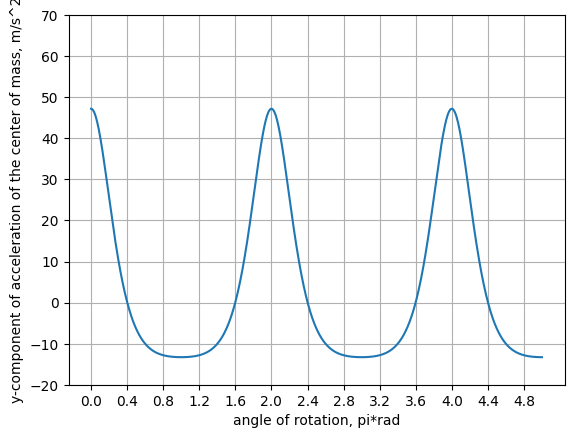

In [9]:
fi = np.linspace(0,5,1000)
ydd = yddonfi(3.1416*fi)
plt.ylim(-20, 70)
plt.xticks(np.arange(0,5, 0.4)) 
plt.grid()
plt.plot(fi, ydd)
plt.ylabel('y-component of acceleration of the center of mass, m/s^2')
plt.xlabel('angle of rotation, pi*rad')